In [1]:
import oceanspy as ospy
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import gsw
import cartopy.crs as ccrs
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.colors import Normalize
from matplotlib.colors import SymLogNorm

plt.rcParams.update({
    'font.size': 11,       # Default text size
    'axes.titlesize': 10,  # Title size
    'axes.labelsize': 10,  # Axis label size
    'xtick.labelsize': 8, # X-tick label size
    'ytick.labelsize': 8, # Y-tick label size
    'legend.fontsize': 8, # Legend font size
    'figure.titlesize': 12 # Figure title size
})

In [2]:
# Load data
path = [
    r'D:\MScData\model_69_section.nc',
    r'D:\MScData\model_70_section.nc',
    r'D:\MScData\model_71_section.nc',
    r'D:\MScData\model_72_section.nc',
    r'D:\MScData\model_735_section.nc',
    r'D:\MScData\model_75_section.nc'

]
model_data = [xr.open_dataset(x,engine='netcdf4') for x in path]

path = [
    r'D:\MScData\AL_69.nc',
    r'D:\MScData\AL_70.nc',
    r'D:\MScData\AL_71.nc',
    r'D:\MScData\AL_72.nc',
    r'D:\MScData\AL_735.nc',
    r'D:\MScData\AL_75.nc'
]
obs_data = [xr.open_dataset(x,engine='netcdf4') for x in path]
vertical_res = xr.open_dataset(r'D:\MScData\drF.nc')['drF']

In [3]:
display(obs_data[0])
display(obs_data[0].pressure.values)

<xarray.Dataset>
Dimensions:       (index: 22, pressure_dim: 3790)
Coordinates:
  * index         (index) int64 585 622 691 718 761 ... 1064 1132 1155 1211 1241
  * pressure_dim  (pressure_dim) int32 0 1 2 3 4 5 ... 3785 3786 3787 3788 3789
Data variables:
    pressure      (index, pressure_dim) float64 ...
    temperature   (index, pressure_dim) float64 ...
    salinity      (index, pressure_dim) float64 ...
    longitude     (index) float64 ...
    latitude      (index) float64 ...
    time          (index) datetime64[ns] ...
    source        (index) object ...
    SA            (index, pressure_dim) float64 ...

array([[ 2.,  4.,  6., ..., nan, nan, nan],
       [ 2.,  4.,  6., ..., nan, nan, nan],
       [ 2.,  4.,  6., ..., nan, nan, nan],
       ...,
       [ 2.,  4.,  6., ..., nan, nan, nan],
       [ 2.,  4.,  6., ..., nan, nan, nan],
       [ 2.,  4.,  6., ..., nan, nan, nan]])

In [4]:
display(model_data[0])

<xarray.Dataset>
Dimensions:            (station: 22, Z: 216, Zp1: 217, Zu: 216, Zl: 216,
                        time: 1460, time_midp: 1459, station_midp: 21)
Coordinates:
    lat                (station) float64 ...
    lon                (station) float64 ...
  * Z                  (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
  * Zp1                (Zp1) float64 0.0 -2.0 -5.0 ... -3.932e+03 -3.951e+03
  * Zu                 (Zu) float64 -2.0 -5.0 -9.0 ... -3.932e+03 -3.951e+03
  * Zl                 (Zl) float64 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03
  * time               (time) datetime64[ns] 2017-09-01 ... 2018-08-31T18:00:00
  * time_midp          (time_midp) datetime64[ns] 2017-09-01T03:00:00 ... 201...
  * station            (station) int64 0 1 2 3 4 5 6 7 ... 15 16 17 18 19 20 21
    station_dist       (station) float64 ...
  * station_midp       (station_midp) float64 0.5 1.5 2.5 3.5 ... 18.5 19.5 20.5
    station_midp_dist  (station_midp) float64 ...
Data variables:
    XC                 (station) float64 ...
    YC                 (station) float64 ...
    XG                 (station) float64 ...
    YG                 (station) float64 ...
    Temp               (time, Z, station) float64 ...
    S                  (time, Z, station) float64 ...
    YU                 (station) float64 ...
    XU                 (station) float64 ...
    YV                 (station) float64 ...
    XV                 (station) float64 ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Z': {'Z': None, 'Zp1': 0.5, 'Zu': 0.5, 'Zl': -...
    OceanSpy_grid_periodic:  []

Text(0.5, 1.0, 'Observations')

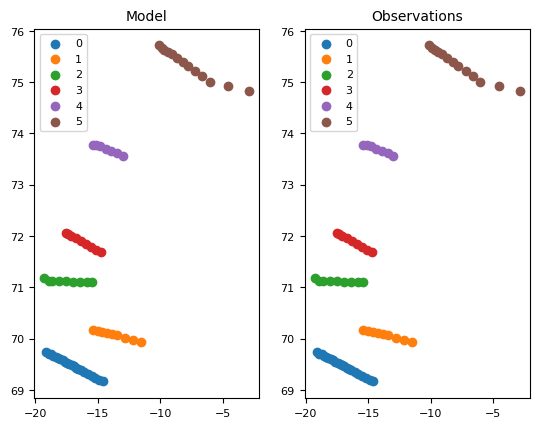

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2)
for x,data in enumerate(model_data):
    ax1.scatter(data.lon,data.lat,label=x)
ax1.legend()
ax1.set_title('Model')

for x,data in enumerate(obs_data):
    ax2.scatter(data.longitude,data.latitude,label=x)
ax2.legend()
ax2.set_title('Observations')

Text(0.5, 1.0, 'Model')

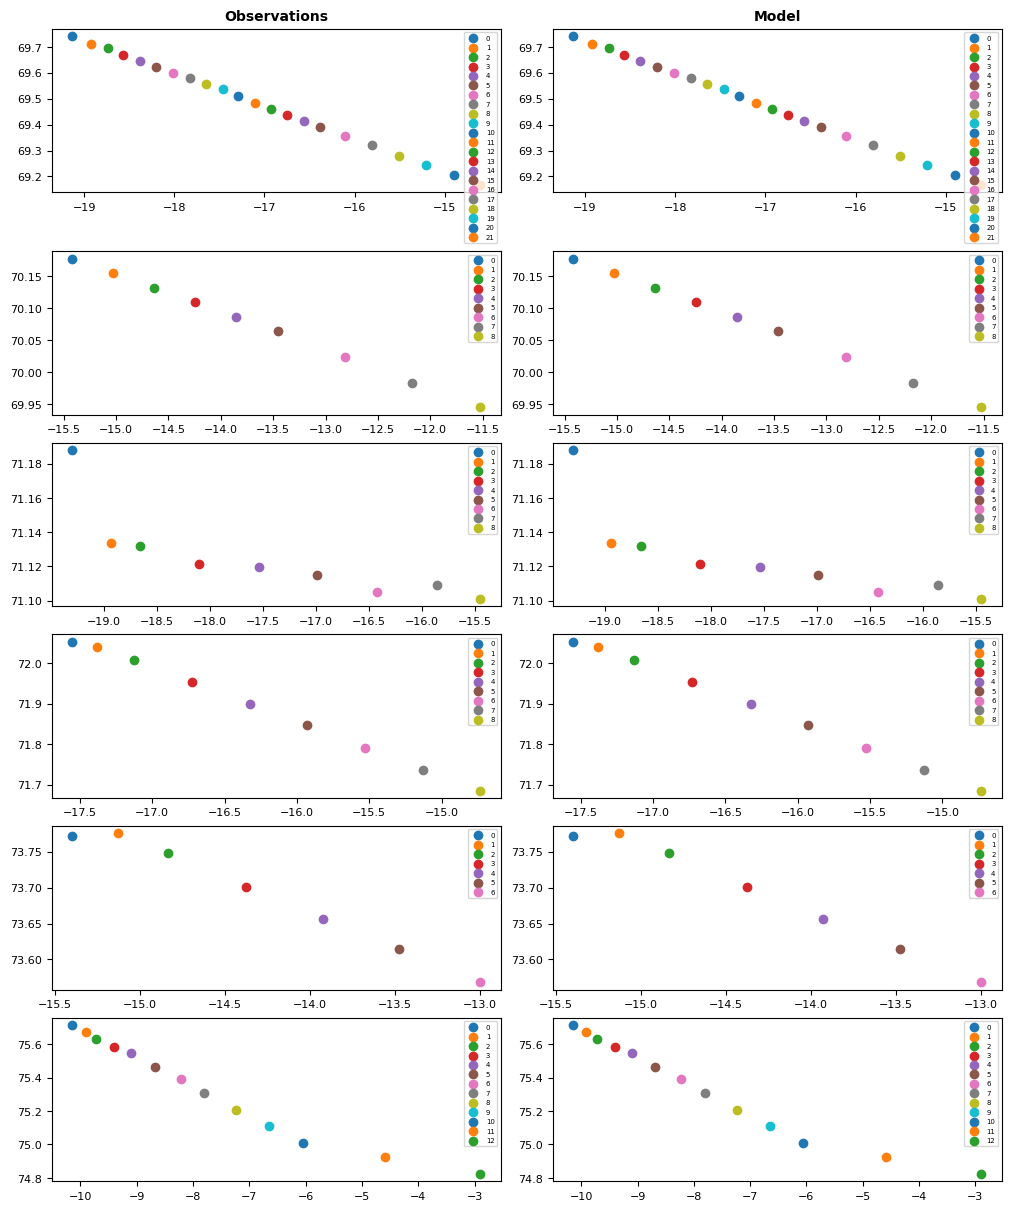

In [6]:
fig, axs = plt.subplot_mosaic([[0,1],
                               [2,3],
                               [4,5],
                               [6,7],
                               [8,9],
                               [10,11]],
                               figsize=(10,12), layout='constrained')
num = [1,3,5,7,9,11]
for x, data in enumerate(obs_data):
    for i in range(len(data.longitude)):
        axs[x*2].scatter(data.longitude[i],data.latitude[i],label=i)
        axs[x*2].legend(prop={"size": 5})
axs[0].set_title('Observations',fontweight='bold')

for x, data in enumerate(model_data):
    for i in range(len(data.station)):
        axs[num[x]].scatter(data.lon[i],data.lat[i],label=i)
        axs[num[x]].legend(prop={"size": 5})
axs[1].set_title('Model',fontweight='bold')

In [7]:
display(model_data[0])

<xarray.Dataset>
Dimensions:            (station: 22, Z: 216, Zp1: 217, Zu: 216, Zl: 216,
                        time: 1460, time_midp: 1459, station_midp: 21)
Coordinates:
    lat                (station) float64 69.74 69.71 69.7 ... 69.24 69.21 69.17
    lon                (station) float64 -19.13 -18.93 -18.74 ... -14.9 -14.61
  * Z                  (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
  * Zp1                (Zp1) float64 0.0 -2.0 -5.0 ... -3.932e+03 -3.951e+03
  * Zu                 (Zu) float64 -2.0 -5.0 -9.0 ... -3.932e+03 -3.951e+03
  * Zl                 (Zl) float64 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03
  * time               (time) datetime64[ns] 2017-09-01 ... 2018-08-31T18:00:00
  * time_midp          (time_midp) datetime64[ns] 2017-09-01T03:00:00 ... 201...
  * station            (station) int64 0 1 2 3 4 5 6 7 ... 15 16 17 18 19 20 21
    station_dist       (station) float64 ...
  * station_midp       (station_midp) float64 0.5 1.5 2.5 3.5 ... 18.5 19.5 20.5
    station_midp_dist  (station_midp) float64 ...
Data variables:
    XC                 (station) float64 ...
    YC                 (station) float64 ...
    XG                 (station) float64 ...
    YG                 (station) float64 ...
    Temp               (time, Z, station) float64 ...
    S                  (time, Z, station) float64 ...
    YU                 (station) float64 ...
    XU                 (station) float64 ...
    YV                 (station) float64 ...
    XV                 (station) float64 ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Z': {'Z': None, 'Zp1': 0.5, 'Zu': 0.5, 'Zl': -...
    OceanSpy_grid_periodic:  []

In [8]:
display(vertical_res)

<xarray.DataArray 'drF' (Z: 216)>
[216 values with dtype=float64]
Coordinates:
  * Z        (Z) float64 -1.0 -3.5 -7.0 ... -3.904e+03 -3.922e+03 -3.942e+03
Attributes:
    description:    r cell face separation
    standard_name:  cell_z_size
    long_name:      cell z size
    units:          m

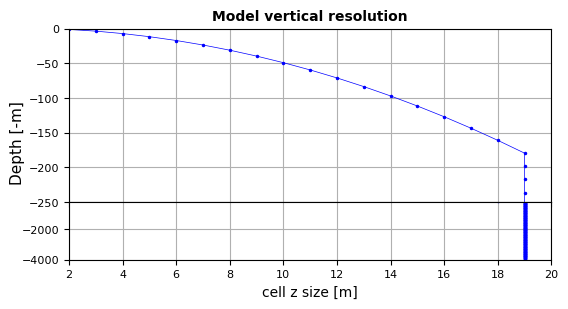

In [9]:
fig, ax = plt.subplot_mosaic([[0],
                              [1]],figsize=(6.2217,3),sharex=True,gridspec_kw={'height_ratios': [3, 1]})

fig.subplots_adjust(hspace=0)
#fig.tight_layout(pad=0)

ax[0].plot(vertical_res,vertical_res.Z,'b.-',linewidth=0.5,markersize=3)
ax[1].plot(vertical_res,vertical_res.Z,'b.-',linewidth=0.5,markersize=3)

ax[1].set_xlabel('cell z size [m]')
# Add a common y-axis label in the center of the figure
fig.text(0.03, 0.5, 'Depth [-m]', va='center', rotation='vertical')
ax[0].set_title('Model vertical resolution',fontweight='bold')

ax[0].set_ylim(-250,0)
ax[1].set_ylim(-4000,-250)
ax[0].set_xlim(2,20)
ax[1].set_xlim(2,20)
ax[0].grid()
ax[1].grid()

fig.savefig(r'C:\Users\eirik\Master\Figures\ModelVerticalRes',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches='tight',pad_inches=0.25)

In [10]:
time_fix_model = []
for i,j in zip(model_data,obs_data):
    sec = []
    model = i
    for x, station_time in enumerate(j.time):
        sec.append(model.sel(station=x).sel(time=station_time,method='nearest'))
    time_fix_model.append(sec)

In [11]:
display(time_fix_model[4][0])
display(obs_data[4])

<xarray.Dataset>
Dimensions:            (Z: 216, Zp1: 217, Zu: 216, Zl: 216, time_midp: 1459,
                        station_midp: 6)
Coordinates: (12/13)
    lat                float64 73.77
    lon                float64 -15.4
  * Z                  (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
  * Zp1                (Zp1) float64 0.0 -2.0 -5.0 ... -3.932e+03 -3.951e+03
  * Zu                 (Zu) float64 -2.0 -5.0 -9.0 ... -3.932e+03 -3.951e+03
  * Zl                 (Zl) float64 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03
    ...                 ...
  * time_midp          (time_midp) datetime64[ns] 2017-09-01T03:00:00 ... 201...
    station            int64 0
    station_dist       float64 ...
  * station_midp       (station_midp) float64 0.5 1.5 2.5 3.5 4.5 5.5
    station_midp_dist  (station_midp) float64 ...
    index              int64 1144
Data variables:
    XC                 float64 ...
    YC                 float64 ...
    XG                 float64 ...
    YG                 float64 ...
    Temp               (Z) float64 ...
    S                  (Z) float64 ...
    YU                 float64 ...
    XU                 float64 ...
    YV                 float64 ...
    XV                 float64 ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Z': {'Z': None, 'Zp1': 0.5, 'Zu': 0.5, 'Zl': -...
    OceanSpy_grid_periodic:  []

<xarray.Dataset>
Dimensions:       (index: 7, pressure_dim: 3790)
Coordinates:
  * index         (index) int64 1144 1164 1219 1279 1372 1481 1588
  * pressure_dim  (pressure_dim) int32 0 1 2 3 4 5 ... 3785 3786 3787 3788 3789
Data variables:
    pressure      (index, pressure_dim) float64 ...
    temperature   (index, pressure_dim) float64 ...
    salinity      (index, pressure_dim) float64 ...
    longitude     (index) float64 -15.4 -15.13 -14.84 -14.38 -13.93 -13.48 -13.0
    latitude      (index) float64 73.77 73.78 73.75 73.7 73.66 73.61 73.57
    time          (index) datetime64[ns] ...
    source        (index) object ...
    SA            (index, pressure_dim) float64 ...

In [12]:
display(time_fix_model[0][0].S)

<xarray.DataArray 'S' (Z: 216)>
[216 values with dtype=float64]
Coordinates:
    lat           float64 69.74
    lon           float64 -19.13
  * Z             (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
    time          datetime64[ns] 2018-02-14T18:00:00
    station       int64 0
    station_dist  float64 ...
    index         int64 585
Attributes:
    long_name:      salinity
    standard_name:  sea_water_salinity
    units:          g kg-1
    _coordinates:   XC YC RC iter

Text(0.5, 0, 'Longitude')

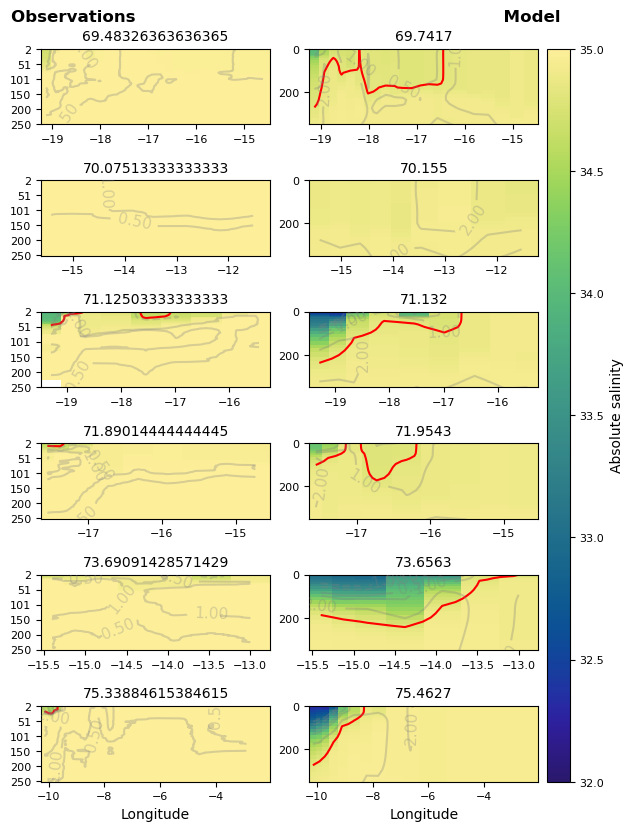

In [13]:
import cmocean.cm as cmo
fig, axs = plt.subplot_mosaic([[0,1,'r'],
                               [2,3,'r'],
                               [4,5,'r'],
                               [6,7,'r'],
                               [8,9,'r'],
                               [10,11,'r']],
                               gridspec_kw={'width_ratios': [1, 1, 0.1]},
                               figsize=(6.2217,8), layout='constrained')
num = [1,3,5,7,9,11]
vmin, vmax = 32,35
vmint, vmaxt = -2,2
cmap = cmo.haline
ref = 34.66 + 0.157
for x, data in enumerate(obs_data):
    longitude, pressure = np.meshgrid(data.longitude,data.pressure_dim)
    SA = data.SA
    TP = data.temperature
    axs[x*2].pcolormesh(longitude,-pressure,SA.T,vmin=vmin,vmax=vmax,cmap=cmap)
    axs[x*2].contour(longitude,-pressure,SA.T,[34.66],colors='red')
    axs[x*2].set_ylim(-250, 0)
    yticks = np.linspace(0, 248, 6)
    axs[x*2].set_yticks(-yticks)
    yticks = np.linspace(2, 250, 6)
    axs[x*2].set_yticklabels([f'{int(tick)}' for tick in yticks])
    axs[x*2].set_title(data.latitude.mean().values)
    cntr = axs[x*2].contour(longitude,-pressure,TP.T,[-1,-0.5,0.5,1,2],vmin=vmint,vmax=vmaxt,colors='grey',alpha=0.3)
    axs[x*2].clabel(cntr,fmt="%2.2f",use_clabeltext=True)


for x, data in enumerate(time_fix_model):
    datalon = []
    dataZ = []
    SA = []
    TP = []
    for subdata in data:
        datalon.append(subdata.lon.values)
        dataZ.append(subdata.Z.values)
        SA.append(subdata.S.values)
        TP.append(subdata.Temp)

    longitude, pressure = np.meshgrid(datalon,dataZ[0])
    mesh = axs[num[x]].pcolormesh(longitude,-pressure,np.transpose(SA),vmin=vmin,vmax=vmax,cmap=cmap)
    axs[num[x]].set_ylim(350,0)
    axs[num[x]].contour(longitude,-pressure,np.transpose(SA),[ref],colors='red')
    cntr = axs[num[x]].contour(longitude,-pressure,np.transpose(TP),[-1,-0.5,0.5,1,2],vmin=vmint,vmax=vmaxt,colors='grey',alpha=0.3)
    axs[num[x]].clabel(cntr,fmt="%2.2f",use_clabeltext=True)
    axs[num[x]].set_title(np.mean([subdata.lat.values for subdata in data][x]))
fig.suptitle('Observations                                                                Model',fontweight='bold',x=0.45, y=1.02)
cbar = fig.colorbar(mesh,cax=axs['r'])
cbar.set_label('Absolute salinity')
axs[10].set_xlabel('Longitude')
axs[11].set_xlabel('Longitude')

In [14]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, r'C:\Users\eirik\Master\FreshWater')
from FW import FWC

In [15]:
modelFWC = FWC(model=True,data=time_fix_model,ref_salinity=34.743,vertical_res_model=vertical_res)
obsFWC = FWC(obs=True,data=obs_data,ref_salinity=34.9,vertical_res_model=vertical_res)

In [16]:
display(modelFWC[0][0])

<xarray.DataArray (Z: 216)>
array([0.04186764, 0.10455542, 0.18790145, 0.29155667, 0.41465645,
       0.55428379, 0.69289694, 0.80543434, 0.90362075, 0.98760661,
       1.06271873, 1.12873209, 1.18290289, 1.22910858, 1.26536178,
       1.28846428, 1.30217505, 1.30671551, 1.29979367, 1.28517408,
       1.26408176, 1.23362156, 1.19137371, 1.13894652, 1.07620772,
       1.00410959, 0.92388975, 0.83677802, 0.74554125, 0.65264189,
       0.55765421, 0.46072253, 0.36297006, 0.2643397 , 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
...
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229, 0.16514229, 0.16514229, 0.16514229, 0.16514229,
       0.16514229])
Coordinates:
    lat           float64 69.74
    lon           float64 -19.13
  * Z             (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
    time          datetime64[ns] 2018-02-14T18:00:00
    station       int64 0
    station_dist  float64 ...
    index         int64 585

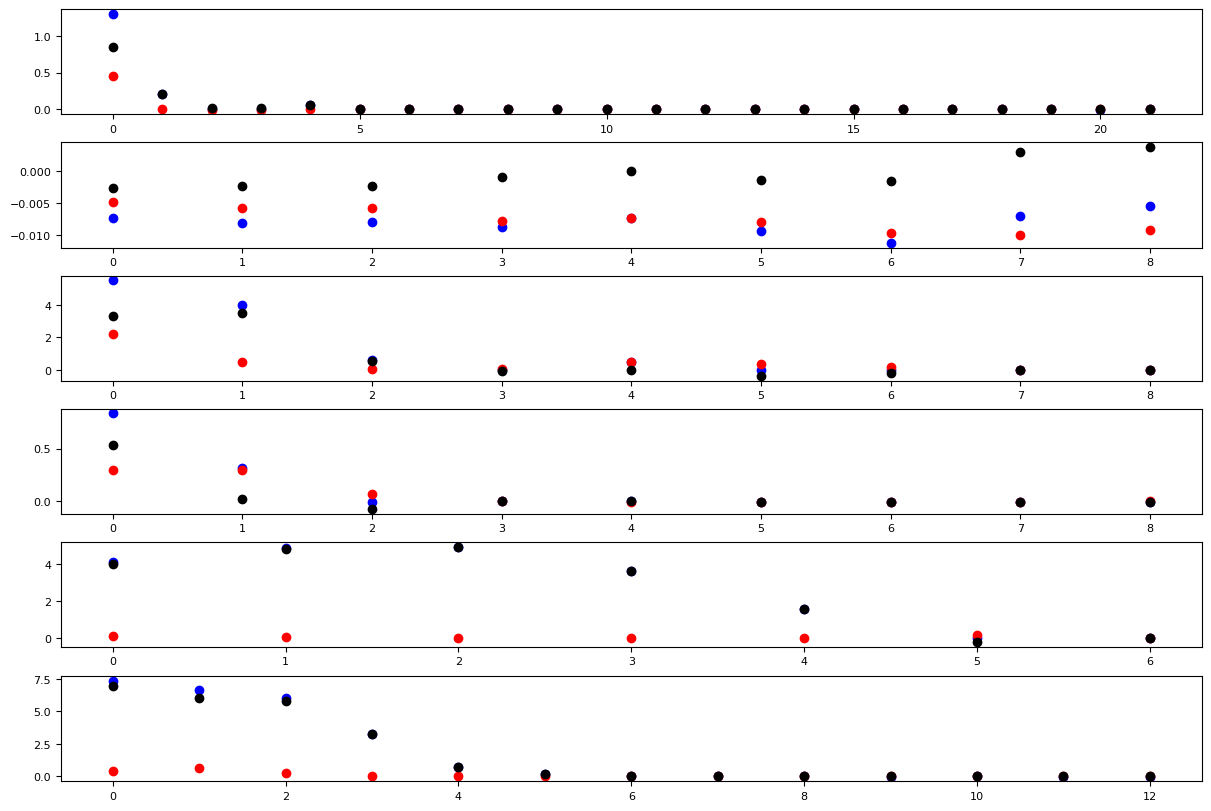

In [17]:
fig, axs = plt.subplot_mosaic([[0],
                               [1],
                               [2],
                               [3],
                               [4],
                               [5]],figsize=(12,8),layout='constrained')
for j, data in enumerate(modelFWC):
    for i,subdata in enumerate(data):
        axs[j].scatter(i,np.max(subdata),color='blue')
        axs[j].scatter(i,np.max(obsFWC[j][i]),color='red')
        axs[j].scatter(i,np.max(subdata)-np.max(obsFWC[j][i]),color='black')

# Root Mean Square Error (RMSE)

In [18]:
diff = []
for x,y in zip(modelFWC,obsFWC):
    for i,j in zip(x,y):
        diff.append((i.max().values-j.max().values)**2)

RMSE = np.sqrt(np.sum(diff)/len(diff))
print(len(diff),sum(diff))
print('RMSE: ',RMSE)

69 232.2895817800263
RMSE:  1.8348067140631994


In [19]:
FWC_non_cum_Obs = []
FWC_non_cum_Mod = []
for x,y in zip(modelFWC,obsFWC):
    for i,j in zip(x,y):
        FWC_non_cum_Mod.append(i.max())
        FWC_non_cum_Obs.append(j.max())

Text(0, 0.5, 'Observation')

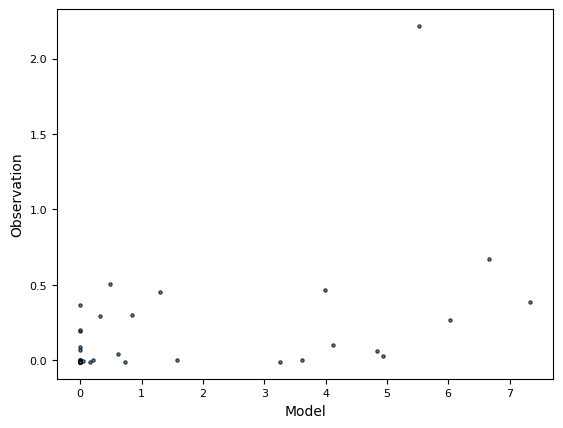

In [20]:
fig, ax = plt.subplots()
ax.scatter(FWC_non_cum_Mod,FWC_non_cum_Obs,s=5,edgecolors='black',alpha=0.7)
ax.set_xlabel('Model')
ax.set_ylabel('Observation')

In [21]:
from scipy.stats.stats import pearsonr   

print(pearsonr(FWC_non_cum_Mod,FWC_non_cum_Obs))

PearsonRResult(statistic=0.5287055920787961, pvalue=3.0147028981616836e-06)


C:\Users\eirik\AppData\Local\Temp\ipykernel_19300\1775090252.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


# Possible solution?
- Calculate Reference salinity from practical salinity
    - Calculate Practical salinity with gsw.SP_from_SA(SA,p,lon,lat)
    - Calculate Reference salinity with gsw.SR_from_SP(SP)

In [22]:
time_fix_model[0][0]

<xarray.Dataset>
Dimensions:            (Z: 216, Zp1: 217, Zu: 216, Zl: 216, time_midp: 1459,
                        station_midp: 21)
Coordinates: (12/13)
    lat                float64 69.74
    lon                float64 -19.13
  * Z                  (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
  * Zp1                (Zp1) float64 0.0 -2.0 -5.0 ... -3.932e+03 -3.951e+03
  * Zu                 (Zu) float64 -2.0 -5.0 -9.0 ... -3.932e+03 -3.951e+03
  * Zl                 (Zl) float64 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03
    ...                 ...
  * time_midp          (time_midp) datetime64[ns] 2017-09-01T03:00:00 ... 201...
    station            int64 0
    station_dist       float64 ...
  * station_midp       (station_midp) float64 0.5 1.5 2.5 3.5 ... 18.5 19.5 20.5
    station_midp_dist  (station_midp) float64 ...
    index              int64 585
Data variables:
    XC                 float64 ...
    YC                 float64 ...
    XG                 float64 ...
    YG                 float64 ...
    Temp               (Z) float64 0.1623 0.1707 0.1826 0.2022 ... nan nan nan
    S                  (Z) float64 34.02 34.02 34.02 34.02 ... nan nan nan nan
    YU                 float64 ...
    XU                 float64 ...
    YV                 float64 ...
    XV                 float64 ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Z': {'Z': None, 'Zp1': 0.5, 'Zu': 0.5, 'Zl': -...
    OceanSpy_grid_periodic:  []

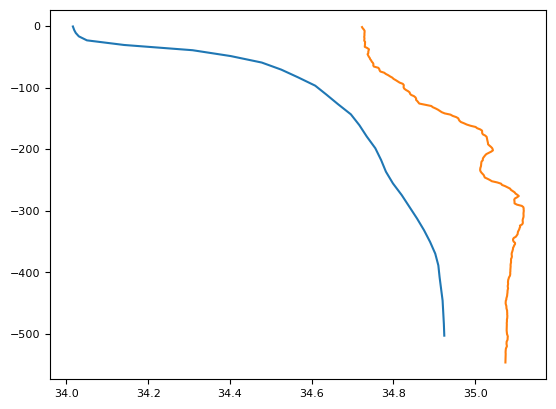

In [23]:
fig, ax = plt.subplots()
ax.plot(time_fix_model[0][0].S,time_fix_model[0][0].Z)
ax.plot(obs_data[0].SA[0],-obs_data[0].pressure[0])

Text(0.5, 0.98, 'Salinity observation and model')

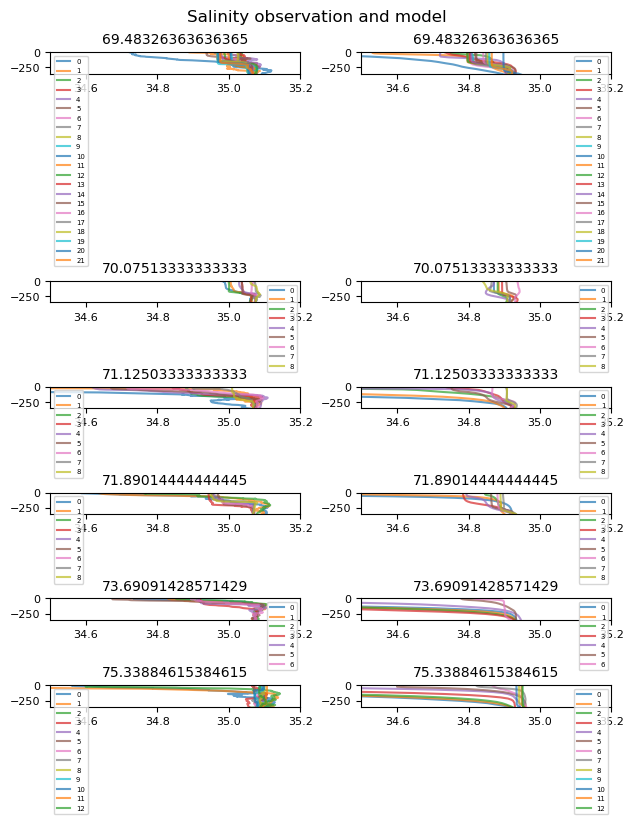

In [24]:
fig, ax = plt.subplot_mosaic([[0,10],
                               [1,11],
                               [2,12],
                               [3,13],
                               [4,14],
                               [5,15]],figsize=(6.2217,8),layout='constrained')
for x,data in enumerate(obs_data):
    ax[x].set_title(data.latitude.mean().values)
    for i in range(len(data.SA)):
        # if data.SA[i][0] >= 34.9:
        #     continue
        ax[x].plot(data.SA[i],-data.pressure[i],alpha=0.7,label=i)
        ax[x].legend(prop={"size": 5})
        ax[x].set_xlim(34.5,35.2)
        ax[x].set_ylim(-350,0)

for x,data in enumerate(time_fix_model):
    ax[x+10].set_title(np.mean([subdata.lat for subdata in data]))
    for i in range(len(data)):
        # if data[i].S[0] >= 34.9:
        #     continue
        ax[x+10].plot(data[i].S,data[i].Z,alpha=0.7,label=i)
        ax[x+10].legend(prop={"size": 5})
        ax[x+10].set_xlim(34.5,35.2)
        ax[x+10].set_ylim(-350,0)

fig.suptitle('Salinity observation and model')

Text(0.5, 0.98, 'Temperature observation and model')

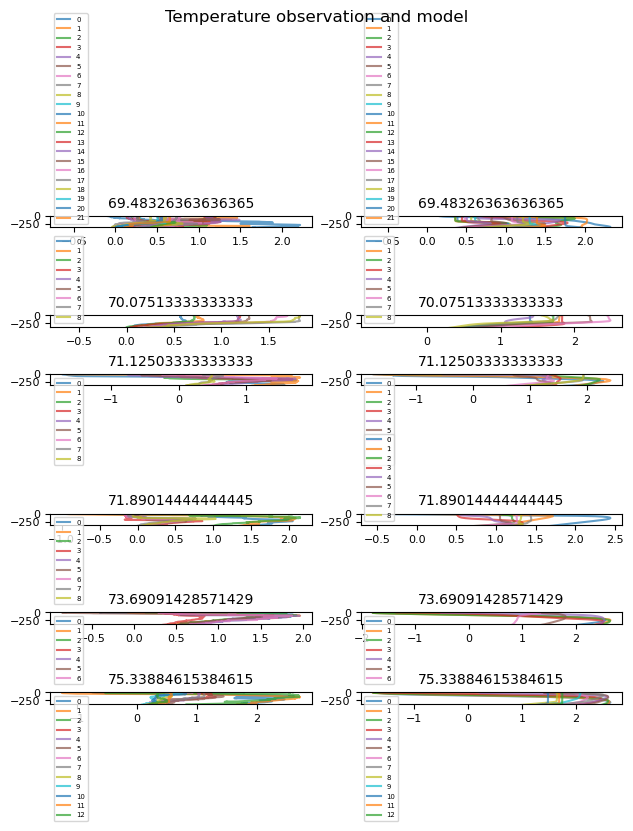

In [25]:
fig, ax = plt.subplot_mosaic([[0,10],
                               [1,11],
                               [2,12],
                               [3,13],
                               [4,14],
                               [5,15]],figsize=(6.2217,8),layout='constrained')
for x,data in enumerate(obs_data):
    ax[x].set_title(data.latitude.mean().values)
    for i in range(len(data.SA)):
        # if data.SA[i][0] >= 34.9:
        #     continue
        ax[x].plot(data.temperature[i],-data.pressure[i],alpha=0.7,label=i)
        ax[x].legend(prop={"size": 5})
        #ax[x].set_xlim(34.5,35.2)
        ax[x].set_ylim(-350,0)

for x,data in enumerate(time_fix_model):
    ax[x+10].set_title(np.mean([subdata.lat for subdata in data]))
    for i in range(len(data)):
        # if data[i].S[0] >= 34.9:
        #     continue
        ax[x+10].plot(data[i].Temp,data[i].Z,alpha=0.7,label=i)
        ax[x+10].legend(prop={"size": 5})
        #ax[x+10].set_xlim(34.5,35.2)
        ax[x+10].set_ylim(-350,0)

fig.suptitle(f'Temperature observation and model')

In [26]:
# Variance and correlation
con = False
sec_corr = []
sec_corr_T = []
sec_var = []
sec_var_T = []
sec_sig = []
sec_sig_T = []
sec_mod_S = []
sec_mod_T = []
sec_obs_S = []
sec_obs_T = []
for x, data in enumerate(zip(obs_data,time_fix_model)):
    sta_corr = []
    sta_corr_T = []
    sta_var = []
    sta_var_T = []
    sta_sig = []
    sta_sig_T = []
    sta_mod_S = []
    sta_mod_T = []
    sta_obs_S = []
    sta_obs_T = []
    if con:
        break
    for y,subdata in enumerate(data[1]):

        depth = gsw.z_from_p(data[0].pressure[y].dropna(dim='pressure_dim').values,data[0].latitude[y].values)
        CT = gsw.CT_from_t(data[0].SA[y].dropna(dim='pressure_dim').values,data[0].temperature[y].dropna(dim='pressure_dim').values,data[0].pressure[y].dropna(dim='pressure_dim').values)

        ds = xr.Dataset({
            'SA':('depth',data[0].SA[y].dropna(dim='pressure_dim').values),
            'Temp':('depth',data[0].temperature[y].dropna(dim='pressure_dim').values),
            'CT':('depth',CT)
            },
            coords={
            'pressure': data[0].pressure[y].dropna(dim='pressure_dim').values,
            'depth': depth,
            'lat': data[0].latitude[y].values,
            'lon': data[0].longitude[y].values,
            'time': data[0].time[y].values
            }
            )


        maskedObs = ds.SA.sel(depth=subdata.Z.sel(Z=slice(0,-350)).values,method='nearest')
        maskedObsT = ds.CT.sel(depth=subdata.Z.sel(Z=slice(0,-350)).values,method='nearest')

        mod_data = subdata
        mod_data['p'] = ospy.utils.static_pressure(-mod_data.Z)
        mod_data['SA'] = gsw.SA_from_SP(mod_data.S,mod_data.p,mod_data.lon,mod_data.lat)
        mod_data['CT'] = gsw.CT_from_pt(mod_data.SA,mod_data.Temp)

        # if y == 0 and x == 0:
        #     display(maskedObs)
        #     display(len(maskedObs))
        count = 0
        index_l = []
        maskedObs = maskedObs.drop_duplicates(dim='depth')
        maskedObsT = maskedObsT.drop_duplicates(dim='depth')
        for index in range(1,len(maskedObs)):
            if maskedObs.depth[index-1] != maskedObs.depth[index]:
                count += 1
                index_l.append(index)

        maskedObs = maskedObs[0:count+1]
        maskedObsT = maskedObsT[0:count+1]
        # if y == 0 and x == 0:
        #     display(maskedObs)
        #     display(len(maskedObs))
        mod_no_nan = len(mod_data.S.sel(Z=slice(0,-350)))-len(mod_data.S.sel(Z=slice(0,-350)).dropna(dim='Z'))
        
        try:
            corr = pearsonr(maskedObs[0:count+1-mod_no_nan],mod_data.SA[0:count+1-mod_no_nan])
            corr_T = pearsonr(maskedObsT[0:count+1-mod_no_nan],mod_data.CT[0:count+1-mod_no_nan])
            var = -maskedObs[0:count+1-mod_no_nan] + mod_data.SA[0:count+1-mod_no_nan].values
            varT = -maskedObsT[0:count+1-mod_no_nan] + mod_data.CT[0:count+1-mod_no_nan].values
        except:
            print(x,y,mod_no_nan)
            display(maskedObs[0:count+1-mod_no_nan],subdata.S[0:count+1-mod_no_nan])
            (display(maskedObs))
            con = True
            break
        sta_corr.append(corr[0])
        sta_corr_T.append(corr_T[0])
        sta_var.append(var)
        sta_var_T.append(varT)
        sta_sig.append(corr[1])
        sta_sig_T.append(corr_T[1])

        sta_mod_S.append(mod_data.SA[0:count+1-mod_no_nan])
        sta_mod_T.append(mod_data.CT[0:count+1-mod_no_nan])
        sta_obs_S.append(maskedObs[0:count+1-mod_no_nan])
        sta_obs_T.append(maskedObsT[0:count+1-mod_no_nan])

    sec_corr.append(sta_corr)
    sec_corr_T.append(sta_corr_T)
    sec_var.append(sta_var)
    sec_var_T.append(sta_var_T)
    sec_sig.append(sta_sig)
    sec_sig_T.append(sta_sig_T)

    sec_mod_S.append(sta_mod_S)
    sec_mod_T.append(sta_mod_T)
    sec_obs_S.append(sta_obs_S)
    sec_obs_T.append(sta_obs_T)
    
        


In [27]:
display(len(sec_corr_T))

6

Text(0.5, 0.98, 'Correlation of observations and model data at each sections')

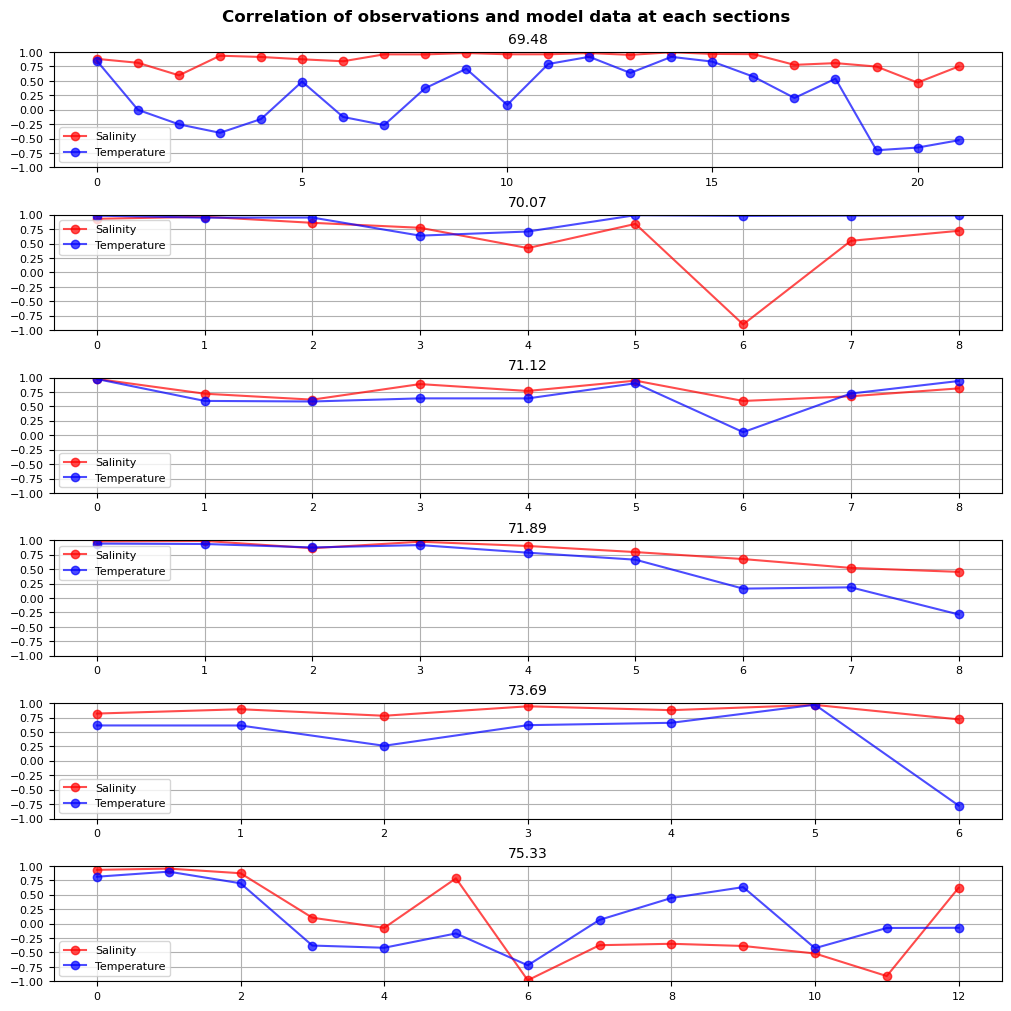

In [28]:
fig, ax = plt.subplot_mosaic([[0],
                              [1],
                              [2],
                              [3],
                              [4],
                              [5]],
                              figsize=(10,10),layout='constrained')
for x,var in enumerate(sec_corr):
    ax[x].plot(var,'r-o',label='Salinity',alpha=0.7)
    ax[x].plot(sec_corr_T[x],'b-o',label='Temperature',alpha=0.7)
    ax[x].set_ylim(-1,1)
    ax[x].set_yticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
    ax[x].grid()
    ax[x].legend()
    ax[x].set_title(str(obs_data[x].latitude.mean().values)[0:5])
fig.suptitle('Correlation of observations and model data at each sections',fontweight='bold')

In [29]:
depth = xr.open_dataset('D:/MScData/Depth_res.nc')['Depth'].sel(Y=slice(68,76)).sel(X=slice(-22.5,-2.5))
depth_notZero = depth
depth = depth.where(depth>0,np.nan)

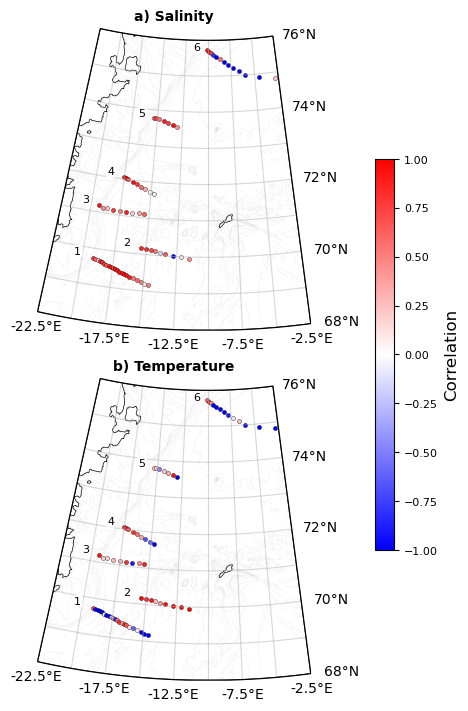

In [30]:
# Map of correlation with observations

# Assuming depth, res, res_smooth, X, and Y are already defined in your Jupyter notebook

lon = depth['XC']
lat = depth['YC']

# Create a figure and axis with Cartopy using NorthPolarStereo projection
fig, (ax,ax2) = plt.subplots(2,1,figsize=(4.6, 7), subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=-10)), layout='constrained')

# Set the extent to focus on the desired geographical area
extent = [-22.5+10, -2.5+10, 68, 76]

# # Plot the data using pcolormesh
# ax.pcolormesh(lon, lat, depth, cmap=cmo.deep,alpha=0.3, transform=ccrs.PlateCarree())
# Add land contour
ax.contour(lon,lat,depth_notZero,[0],colors='black', transform=ccrs.PlateCarree(), linewidths=0.5)
ax.contour(lon,lat,depth_notZero,[100,200,300,400,500,750,1000,1500,2000,3000,4000],colors='grey', linewidths=0.5,alpha=0.1, transform=ccrs.PlateCarree())
# # Plot the data using pcolormesh
# ax2.pcolormesh(lon, lat, depth, cmap=cmo.deep,alpha=0.3, transform=ccrs.PlateCarree())
# Add land contour
ax2.contour(lon,lat,depth_notZero,[0],colors='black', transform=ccrs.PlateCarree(), linewidths=0.5)
ax2.contour(lon,lat,depth_notZero,[100,200,300,400,500,750,1000,1500,2000,3000,4000],colors='grey', linewidths=0.5,alpha=0.1, transform=ccrs.PlateCarree())

cmap = plt.colormaps['bwr']
# cmap = cmo.balance
# Correlation points
for sec, data in enumerate(zip(sec_corr,sec_corr_T)):
    for sta, sub in enumerate(zip(data[0],data[1])):

        if sta == 0:
            ax.annotate(sec+1,(sec_var[sec][sta].lon-1.5, sec_var[sec][sta].lat),transform=ccrs.PlateCarree(),fontsize=8,bbox=dict(facecolor='white', alpha=1, edgecolor='none', boxstyle='round,pad=0.1'))
            ax2.annotate(sec+1,(sec_var[sec][sta].lon-1.5, sec_var[sec][sta].lat),transform=ccrs.PlateCarree(),fontsize=8,bbox=dict(facecolor='white', alpha=1, edgecolor='none', boxstyle='round,pad=0.1'))

        ax.scatter(sec_var[sec][sta].lon, sec_var[sec][sta].lat, s=3**2, color=cmap(sub[0]), edgecolor='black',linewidths=0.25, transform=ccrs.PlateCarree())
        ax2.scatter(sec_var[sec][sta].lon,sec_var[sec][sta].lat, s=3**2, color=cmap(sub[1]), edgecolor='black',linewidths=0.25, transform=ccrs.PlateCarree())
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(-1,1),cmap=cmap), shrink=0.6, pad=0.05,ax=[ax,ax2])
cbar.set_label('Correlation',fontsize=12)

ax.set_title('a) Salinity',fontweight='bold')
ax2.set_title('b) Temperature',fontweight='bold')

# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=ax.transData, edgecolor='black', facecolor='none')
ax.add_patch(patch)
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=ax2.transData, edgecolor='black', facecolor='none')
ax2.add_patch(patch)

# Set the boundary using the transformed path
ax.set_boundary(patch.get_path(), transform=ax.transData)
ax2.set_boundary(patch.get_path(), transform=ax2.transData)

# Add gridlines without labels
gl = ax.gridlines(draw_labels=False,alpha=0.5)
gl2 = ax2.gridlines(draw_labels=False,alpha=0.5)

# Manually add the labels for the bottom and right sides
xticks = np.arange(extent[0]-10, extent[1]-10 + 1, 5)  # Adjust the range and step as needed
yticks = np.arange(extent[2], extent[3] + 1, 2)  # Adjust the range and step as needed

# Add bottom labels
for xtick in xticks:
    ax.text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=10, ha='center', va='top')
    ax2.text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=10, ha='center', va='top')

# Add right labels
for ytick in yticks:
    ax.text(extent[1] + 1-10, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=10, ha='left', va='center')
    ax2.text(extent[1] + 1-10, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=10, ha='left', va='center')

fig.savefig(r'C:\Users\eirik\Master\Figures\ModelObsCorr',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

6


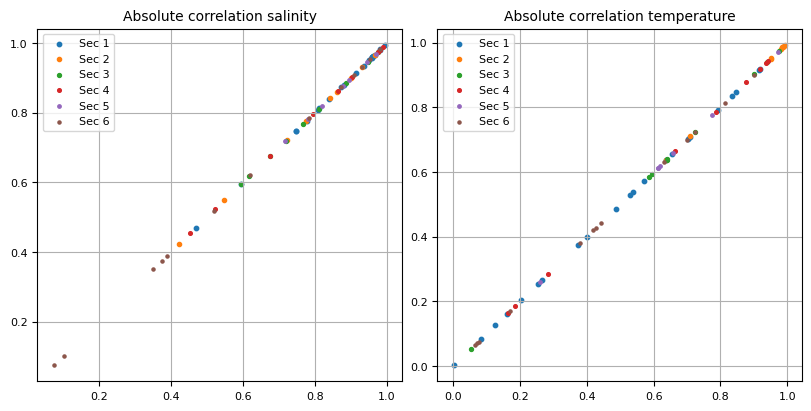

In [31]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
print(len(sec_corr))
fig, (ax,ax2) = plt.subplots(1,2,figsize=(8,4),layout='constrained')
x = 0
for sec in sec_corr:
    ax.scatter(np.abs(sec),np.abs(sec),c=colors[x],s=10-x,label=f'Sec {x+1}')
    x += 1
x = 0
for sec in sec_corr_T:
    ax2.scatter(np.abs(sec),np.abs(sec),c=colors[x],s=10-x,label=f'Sec {x+1}')
    x += 1

ax.set_title('Absolute correlation salinity')
ax2.set_title('Absolute correlation temperature')

ax.grid()
ax2.grid()
ax.legend()
ax2.legend()

Text(0.5, 0.98, 'Variability of observations and model data at each sections')

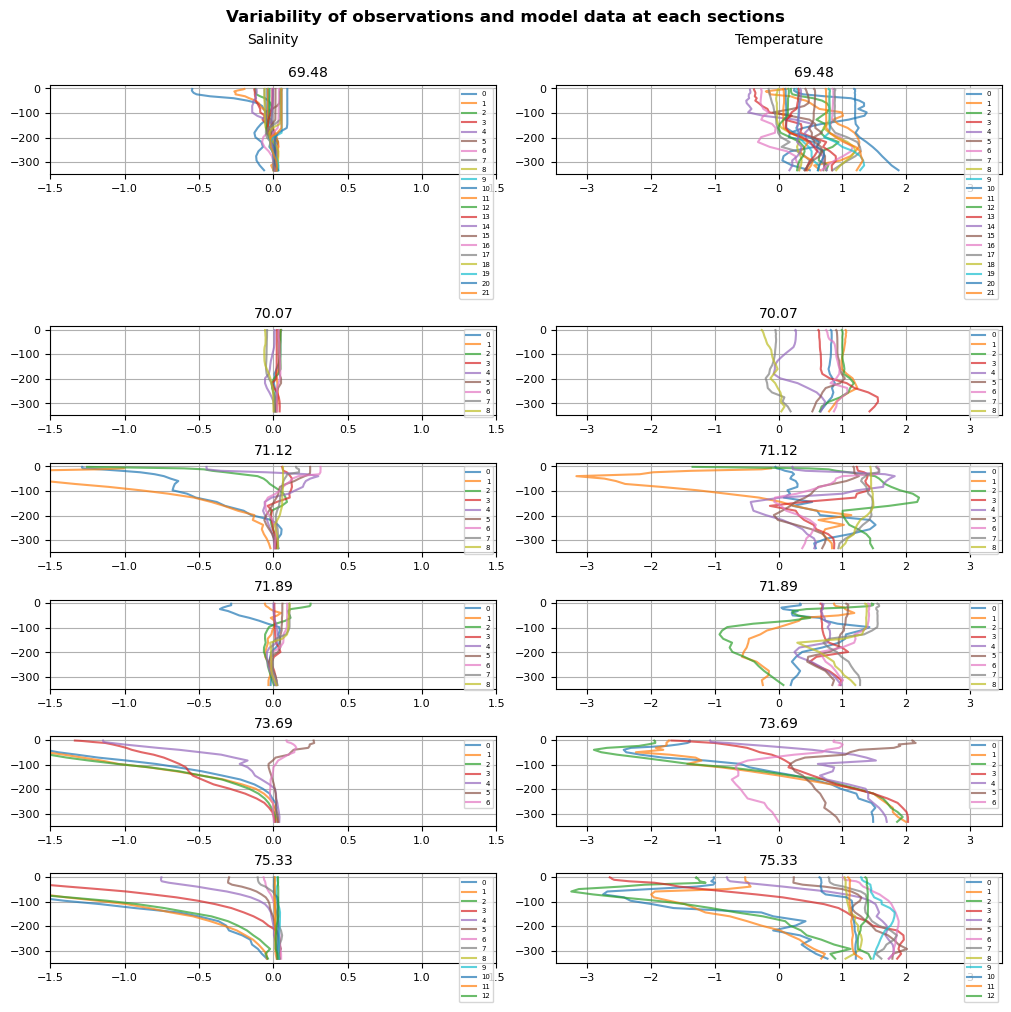

In [32]:
fig, ax = plt.subplot_mosaic([[0,10],
                              [1,11],
                              [2,12],
                              [3,13],
                              [4,14],
                              [5,15]],
                              figsize=(10,10),layout='constrained')
for x,var in enumerate(sec_var):
    for y,data in enumerate(var):
        ax[x].plot(data,data.depth,alpha=0.7,label=y)
    ax[x].legend(prop={"size": 5})
    ax[x].grid()
    ax[x].set_xlim(-1.5,1.5)
    ax[x].set_title(str(obs_data[x].latitude.mean().values)[0:5])
    #ax[x].set_ylim(-300,0)
ax[0].set_title(f'''Salinity\n
                {str(obs_data[0].latitude.mean().values)[0:5]}''')

for x,var in enumerate(sec_var_T):
    for y,data in enumerate(var):
        ax[x+10].plot(data,data.depth,alpha=0.7,label=y)
    ax[x+10].legend(prop={"size": 5})
    ax[x+10].grid()
    ax[x+10].set_xlim(-3.5,3.5)
    ax[x+10].set_title(str(obs_data[x].latitude.mean().values)[0:5])
    #ax[x].set_ylim(-300,0)
ax[10].set_title(f'''Temperature\n
                {str(obs_data[0].latitude.mean().values)[0:5]}''')
fig.suptitle('Variability of observations and model data at each sections',fontweight='bold')

In [33]:
ref_S_data = []
ref_S_data_all = []
temp_all = []
for j, data in enumerate(sec_corr):
    for i, subdata in enumerate(data):
        ref_S_data_all.append(sec_var[j][i])
        temp_all.append(sec_var_T[j][i])
        if subdata >= 0.95 and 1-sec_sig[j][i]>= 0.99:
            ref_S_data.append(sec_var[j][i])

In [34]:
display(len(ref_S_data))

17

In [35]:
ref_S_data_mean_300 = []
ref_S_data_mean_all = []
for j, data in enumerate(sec_corr):
    for i, subdata in enumerate(data):
        if subdata >= 0.95 and 1-sec_sig[j][i]>= 0.99:
            ref_S_data_mean_300.append(np.mean(sec_var[j][i].sel(depth=slice(-200,-700))))
            ref_S_data_mean_all.append(np.median(sec_var[j][i]))
median_all = np.median(ref_S_data_mean_all)
mean_anom_300 = np.mean(ref_S_data_mean_300)

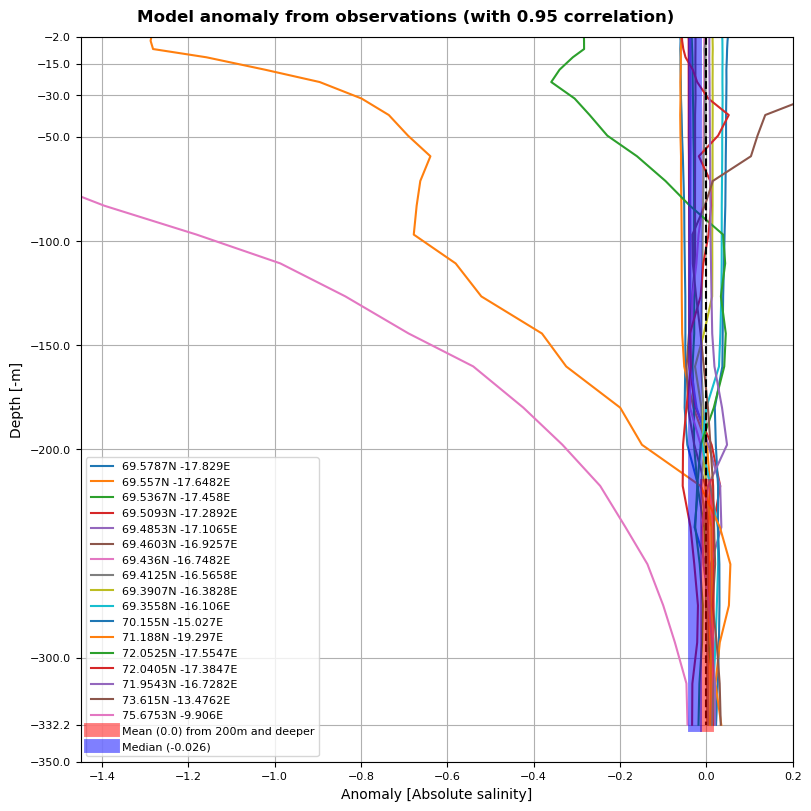

In [36]:
fig, ax = plt.subplots(figsize=(8,8),layout='constrained')
fig.suptitle('Model anomaly from observations (with 0.95 correlation)',fontweight='bold')
for x, data in enumerate(ref_S_data):
    ax.plot(data,data.depth,label=f'{data.lat.values}N {data.lon.values}E')

ax.plot([0 for x in data.depth],data.depth,color='black',linestyle='--')
ax.plot([mean_anom_300 for x in data.depth.sel(depth=slice(-200,-700))],data.depth.sel(depth=slice(-200,-700)),label=f'Mean ({np.round(mean_anom_300,3)}) from 200m and deeper',color='r',linewidth=10,alpha=0.5)
ax.plot([median_all for x in data.depth],data.depth,label=f'Median ({np.round(median_all,3)})',color='b',linewidth=10,alpha=0.5)

ax.set_xlim(-1.45,0.2)
ax.set_ylim(data.depth[-1],data.depth[0])
ax.set_yticks([data.depth[-1],-15,-30,-50,-100,-150,-200,-300,-350,data.depth[0]])
ax.set_ylabel('Depth [-m]')
ax.set_xlabel('Anomaly [Absolute salinity]')
ax.grid()
ax.legend()

In [37]:
ref_S_data_mean_300 = []
ref_S_data_mean_all = []
temp_Z = []

for j, data in enumerate(sec_var):
    for i, subdata in enumerate(data):
        for z in range(len(subdata.depth)):
            if len(temp_Z)<=len(subdata.depth)-1:
                temp_Z.append([sec_var_T[j][i][z].values])
                ref_S_data_mean_all.append([sec_var[j][i][z].values])
            else:
                temp_Z[z].append(sec_var_T[j][i][z].values)
                ref_S_data_mean_all[z].append(sec_var[j][i][z].values)

            # temp_Z.append(np.median(sec_var_T[j][i]))
            # ref_S_data_mean_300.append(np.mean(sec_var[j][i].sel(pressure=slice(200,700))))
            # ref_S_data_mean_all.append(np.median(sec_var[j][i]))

temp_median_Z = []
temp_mean_Z = []
S_median_Z = []
S_mean_Z = []

for i,j in zip(temp_Z,ref_S_data_mean_all):
    temp_median_Z.append(np.median(i))
    S_median_Z.append(np.median(j))
    temp_mean_Z.append(np.mean(i))
    S_mean_Z.append(np.mean(j))

median_all = np.mean(S_median_Z)
mean_all = np.mean(S_mean_Z)
# mean_anom_300 = np.mean(ref_S_data_mean_300)
temp_median = np.mean(temp_median_Z)
temp_mean = np.mean(temp_mean_Z)

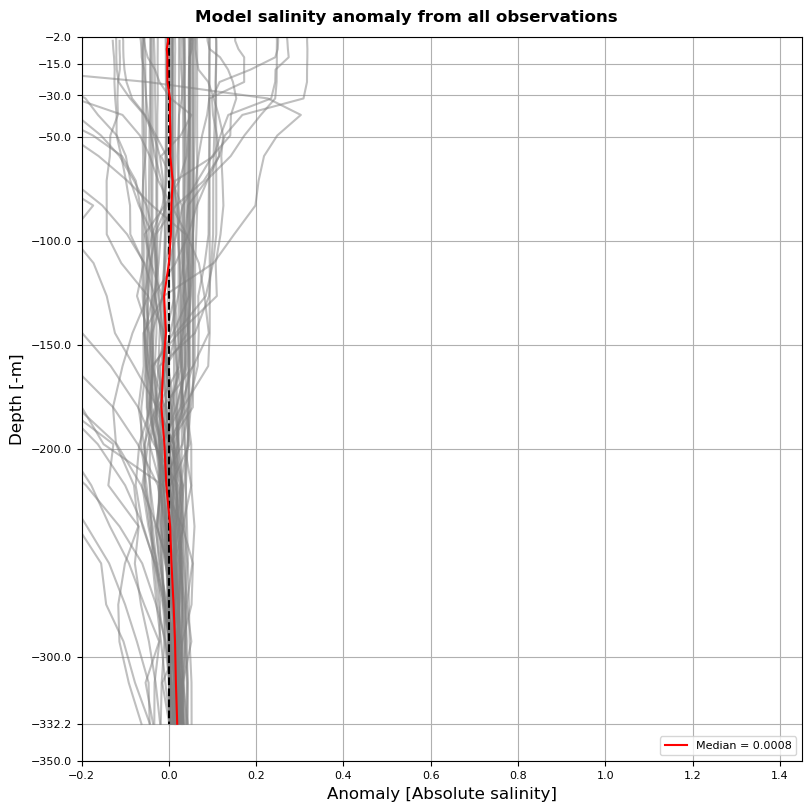

In [38]:
fig, ax = plt.subplots(figsize=(8,8),layout='constrained')
fig.suptitle('Model salinity anomaly from all observations',fontweight='bold',fontsize=12)
for x, data in enumerate(ref_S_data_all):
    ax.plot(data,data.depth,color='grey',alpha=0.5)

ax.plot([0 for x in data.depth],data.depth,color='black',linestyle='--')
# ax.plot([mean_anom_300 for x in data.pressure.sel(pressure=slice(200,700))],-data.pressure.sel(pressure=slice(200,700)),label=f'Mean ({np.round(mean_anom_300,3)}) from 200m and deeper',color='r',linewidth=10,alpha=0.5)
# ax.plot([median_all for x in data.pressure],-data.pressure,label=f'Median ({np.round(median_all,3)})',color='b',linewidth=10,alpha=0.5)
ax.plot(S_median_Z,data.depth,color='red',label=f'Median = {np.round(median_all,4)}')

ax.set_xlim(-0.2,1.45)
ax.set_ylim(data.depth[-1],data.depth[0])
ax.set_yticks([data.depth[-1],-15,-30,-50,-100,-150,-200,-300,-350,data.depth[0]])
ax.set_ylabel('Depth [-m]',fontsize=12)
ax.set_xlabel('Anomaly [Absolute salinity]',fontsize=12)
ax.grid()
ax.legend(loc='lower right')

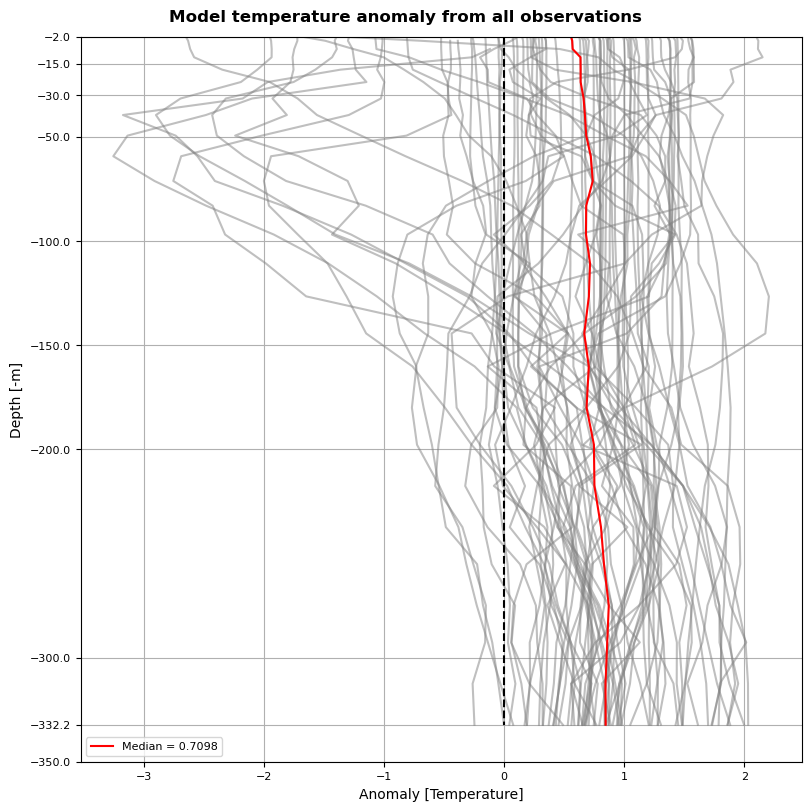

In [39]:
fig, ax = plt.subplots(figsize=(8,8),layout='constrained')
fig.suptitle('Model temperature anomaly from all observations',fontweight='bold')
for x, data in enumerate(temp_all):
    ax.plot(data,data.depth,color='grey',alpha=0.5)

ax.plot([0 for x in data.depth],data.depth,color='black',linestyle='--')
# ax.plot([temp_median for x in data.pressure],-data.pressure,label=f'Median ({np.round(temp_median,3)})',color='b',linewidth=10,alpha=0.5)
# ax.plot(temp,-data.pressure,label=f'Median', color='r',linewidth=10,alpha=0.5)
ax.plot(temp_median_Z,data.depth,color='red',label=f'Median = {np.round(temp_median,4)}')

#ax.set_xlim(-0.2,1.45)
ax.set_ylim(data.depth[-1],data.depth[0])
ax.set_yticks([data.depth[-1],-15,-30,-50,-100,-150,-200,-300,-350,data.depth[0]])
ax.set_ylabel('Depth [-m]')
ax.set_xlabel('Anomaly [Temperature]')
ax.grid()
ax.legend()

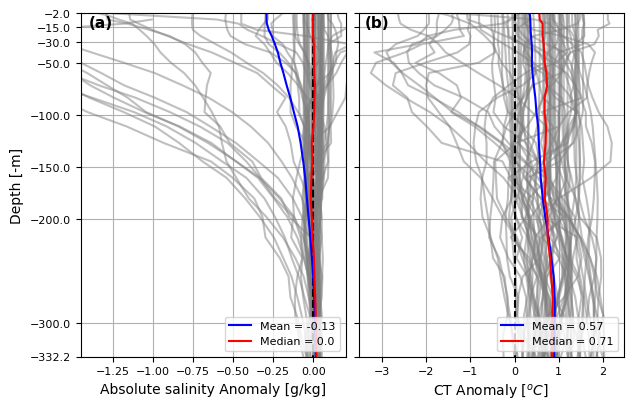

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(6.2217, 4),layout='constrained',sharey=True)
#ax1.set_title('a) Model salinity anomaly from all observations',fontweight='bold',fontsize=12)
for x, data in enumerate(ref_S_data_all):
    ax1.plot(data,data.depth,color='grey',alpha=0.5)

ax1.plot([0 for x in data.depth],data.depth,color='black',linestyle='--')
ax1.plot(S_mean_Z,data.depth,color='blue',label=f'Mean = {np.round(mean_all,2)}')
ax1.plot(S_median_Z,data.depth,color='red',label=f'Median = {np.round(median_all,2)}')

ax1.set_xlim(-1.45,0.2)
ax1.set_ylim(data.depth[-1],data.depth[0])
ax1.set_yticks([data.depth[-1],-15,-30,-50,-100,-150,-200,-300,data.depth[0]])
ax1.set_ylabel('Depth [-m]',fontsize=10)
ax1.set_xlabel('Absolute salinity Anomaly [g/kg]')
ax1.grid()
ax1.legend(loc='lower right')


#ax2.set_title('b) Model temperature anomaly from all observations',fontweight='bold',fontsize=12)
for x, data in enumerate(temp_all):
    ax2.plot(data,data.depth,color='grey',alpha=0.5)

ax2.plot([0 for x in data.depth],data.depth,color='black',linestyle='--')
ax2.plot(temp_mean_Z,data.depth,color='blue',label=f'Mean = {np.round(temp_mean,2)}')
ax2.plot(temp_median_Z,data.depth,color='red',label=f'Median = {np.round(temp_median,2)}')

ax2.set_ylim(data.depth[-1],data.depth[0])
ax2.set_yticks([data.depth[-1],-15,-30,-50,-100,-150,-200,-300,data.depth[0]])
# ax2.set_ylabel('Depth [-m]',fontsize=12)
ax2.set_xlabel('CT Anomaly [$^oC$]')
ax2.grid()
ax2.legend(loc='lower right')

ax1.annotate(text='(a)',xy=[-1.4,-15],fontweight='bold')
ax2.annotate(text='(b)',xy=[-3.4,-15],fontweight='bold')

fig.savefig(r'C:\Users\eirik\Master\Figures\ModelBias',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

array([-2.        , -1.44444444, -0.88888889, -0.33333333,  0.22222222,
        0.77777778,  1.33333333,  1.88888889,  2.44444444,  3.        ])

array([32.3       , 32.62222222, 32.94444444, 33.26666667, 33.58888889,
       33.91111111, 34.23333333, 34.55555556, 34.87777778, 35.2       ])

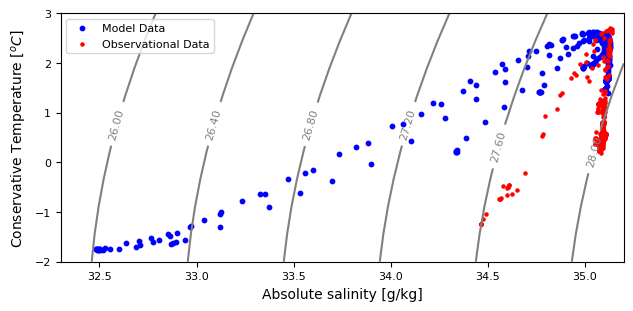

In [41]:
# T-S plot
T_lin = np.linspace(-2,3,10)
S_lin = np.linspace(32.3,35.2,10)

sigma = []

for x in S_lin:
    column = []
    for y in T_lin:
        column.append(gsw.sigma0(x,y))
    sigma.append(column)

display(T_lin,S_lin)

fig, ax = plt.subplots(figsize=(6.2217, 3),layout='constrained')
for data in zip(sta_mod_S,sta_mod_T):
    for subdata in zip(data[0],data[1]):
        ax.scatter(subdata[0],subdata[1],s=10,color='blue',label='Model Data')

for data in zip(sta_obs_S,sta_obs_T):
    for subdata in zip(data[0],data[1]):
        ax.scatter(subdata[0],subdata[1],s=5,color='red',label='Observational Data')

cntr = ax.contour(S_lin,T_lin,np.array(sigma).transpose(),colors='grey')
ax.clabel(cntr,fmt="%2.2f",use_clabeltext=True, fontsize=8)

ax.set_xlim(32.3,35.2)
ax.set_ylim(-2,3)

ax.set_xlabel('Absolute salinity [g/kg]')
ax.set_ylabel('Conservative Temperature [$^oC$]')

# Create custom legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left')

fig.savefig(r'C:\Users\eirik\Master\Figures\TS_plot',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [42]:
from FW import FWC_fixed_structure
modelFWC = FWC_fixed_structure(model=True,data=sec_mod_S,ref_salinity=34.9+median_all,vertical_res_model=vertical_res)
obsFWC = FWC_fixed_structure(obs=True,data=sec_obs_S,ref_salinity=34.9,vertical_res_model=vertical_res,vertical_res_obs=vertical_res)

In [43]:
display(len(modelFWC),len(obsFWC))
display(len(modelFWC[0]),len(obsFWC[0]))

6

6

22

22

In [44]:
display(len(obsFWC[2][0]),obsFWC[2][0],sec_obs_S[2][0])
display(len(modelFWC[2][0]),modelFWC[2][0],sec_mod_S[2][0])

26

array([0.05502328, 0.13749893, 0.24755372, 0.38433766, 0.54370872,
       0.72686041, 0.93419265, 1.16577884, 1.41851361, 1.68411682,
       1.91332993, 2.07600718, 2.15826008, 2.21128989, 2.22098365,
       2.22417009, 2.17957349, 2.13032963, 2.06771666, 2.03706281,
       2.0089391 , 1.97708745, 1.92875011, 1.86002727, 1.78186666,
       1.70791463])

<xarray.DataArray 'SA' (depth: 26)>
array([33.93984384, 33.94053325, 33.93977194, 33.94524807, 33.97299168,
       33.98685802, 33.99551308, 34.00196023, 34.01795566, 34.05731345,
       34.23337187, 34.46327415, 34.69495528, 34.77661731, 34.87885548,
       34.89345842, 34.98646786, 34.9904532 , 35.01501013, 34.95630628,
       34.95165882, 34.95850645, 34.98878807, 35.02623301, 35.0435687 ,
       35.03583819])
Coordinates:
  * depth    (depth) float64 -1.98 -3.959 -7.918 -11.88 ... -292.8 -312.5 -332.3
    lat      float64 71.19
    lon      float64 -19.3
    time     datetime64[ns] 2018-02-20T12:00:00

26

<xarray.DataArray (Z: 26)>
array([0.1287472 , 0.32197547, 0.57904204, 0.88187855, 1.21726053,
       1.58028208, 1.97092102, 2.39245853, 2.84352073, 3.31091193,
       3.76832156, 4.18136281, 4.53591579, 4.83896492, 5.08809926,
       5.27728674, 5.40064022, 5.4605762 , 5.47974348, 5.45695765,
       5.41233908, 5.35074809, 5.27450735, 5.189384  , 5.10024192,
       5.00801636])
Coordinates:
    lat           float64 71.19
    lon           float64 -19.3
  * Z             (Z) float64 -1.0 -3.5 -7.0 -11.5 ... -293.5 -312.5 -331.5
    time          datetime64[ns] 2018-02-20T12:00:00
    station       int64 0
    station_dist  float64 ...
    index         int64 553

<xarray.DataArray 'SA' (Z: 26)>
array([32.65409481, 32.65284461, 32.65782779, 32.78693763, 32.94993499,
       33.09082157, 33.19658333, 33.26611844, 33.32654154, 33.41784585,
       33.57045443, 33.79190215, 34.0169142 , 34.19567383, 34.35734747,
       34.51238449, 34.66160991, 34.79068856, 34.86557592, 34.9426389 ,
       34.98274307, 35.01391944, 35.04082931, 35.05714565, 35.06452758,
       35.07019156])
Coordinates:
    lat           float64 71.19
    lon           float64 -19.3
  * Z             (Z) float64 -1.0 -3.5 -7.0 -11.5 ... -293.5 -312.5 -331.5
    time          datetime64[ns] 2018-02-20T12:00:00
    station       int64 0
    station_dist  float64 ...
    index         int64 553
Attributes:
    long_name:      salinity
    standard_name:  sea_water_salinity
    units:          g kg-1
    _coordinates:   XC YC RC iter

Text(-0.01, 0.5, 'FWC [m]')

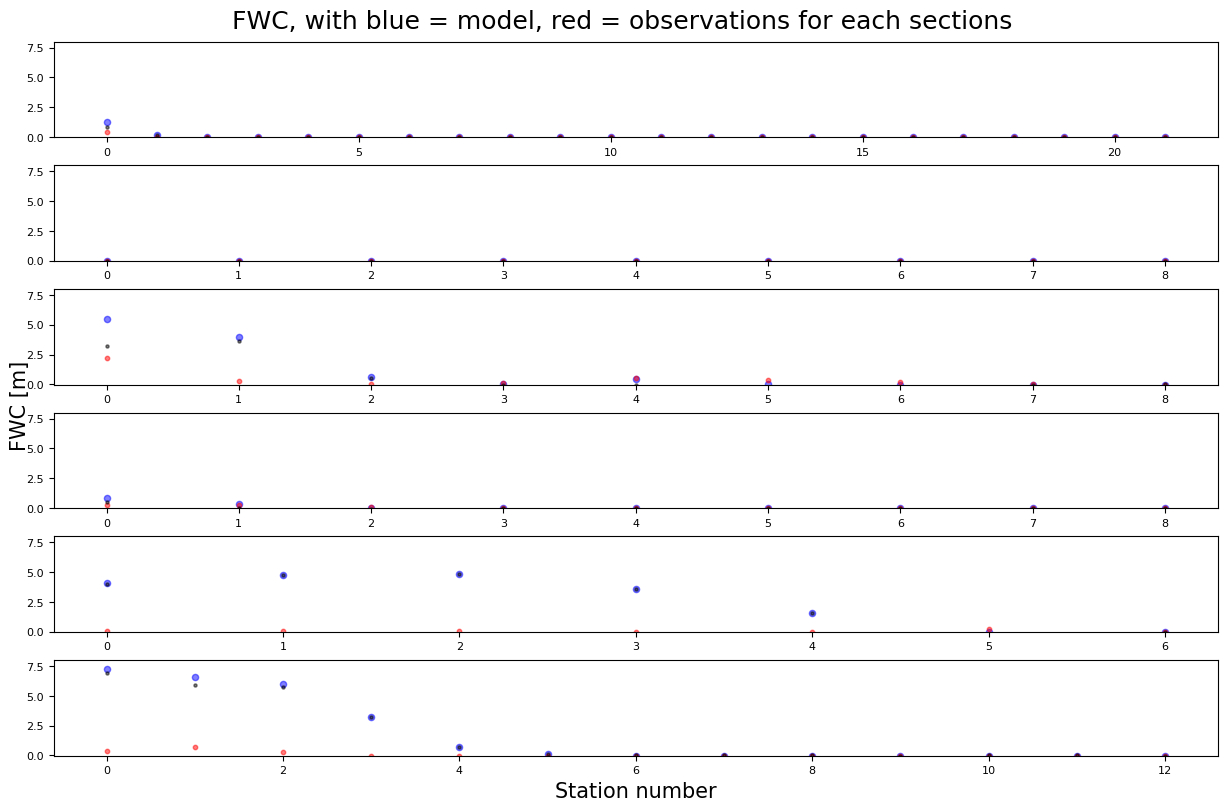

In [45]:
fig, axs = plt.subplot_mosaic([[0],
                               [1],
                               [2],
                               [3],
                               [4],
                               [5]],figsize=(12,8),layout='constrained')
for j, data in enumerate(modelFWC):
    for i,subdata in enumerate(data):
        axs[j].scatter(i,np.max(subdata),s=20,color='blue',alpha=0.5)
        axs[j].scatter(i,np.max(obsFWC[j][i]),s=10,color='red',alpha=0.5)
        axs[j].scatter(i,np.max(subdata)-np.max(obsFWC[j][i]),s=5,color='black',alpha=0.5)

for i in range(6):
    axs[i].set_ylim(-0.02,8)

fig.suptitle('FWC, with blue = model, red = observations for each sections',fontsize=18)
axs[5].set_xlabel('Station number',fontsize=15)
fig.text(-0.01, 0.5, 'FWC [m]', va='center', rotation='vertical', fontsize=15)

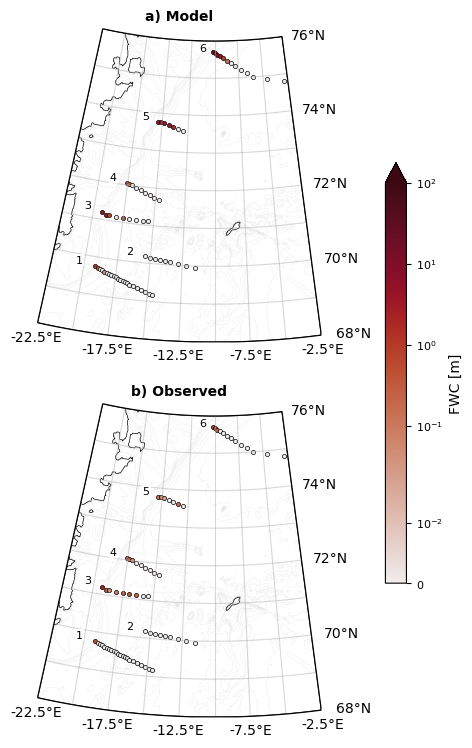

In [46]:
# Map of FWC with observations and model

# Assuming depth, res, res_smooth, X, and Y are already defined in your Jupyter notebook

lon = depth['XC']
lat = depth['YC']

fig, axs = plt.subplot_mosaic([['ul'], ['ll']],
                              # gridspec_kw={'width_ratios': [0.9, 0.1]},
                              subplot_kw={'projection': ccrs.NorthPolarStereo(central_longitude=-10)},
                              figsize=(4.6, 7.5), layout='constrained')

# Set the extent to focus on the desired geographical area
extent = [-22.5+10, -2.5+10, 68, 76]

# # Plot the data using pcolormesh
# ax.pcolormesh(lon, lat, depth, cmap=cmo.deep,alpha=0.3, transform=ccrs.PlateCarree())
# Add land contour
axs['ul'].contour(lon,lat,depth_notZero,[0], linewidths=0.5,colors='black', transform=ccrs.PlateCarree())
axs['ul'].contour(lon,lat,depth_notZero,[100,200,300,400,500,750,1000,1500,2000,3000,4000], linewidths=0.5,colors='grey',alpha=0.1, transform=ccrs.PlateCarree())
# # Plot the data using pcolormesh
# ax2.pcolormesh(lon, lat, depth, cmap=cmo.deep,alpha=0.3, transform=ccrs.PlateCarree())
# Add land contour
axs['ll'].contour(lon,lat,depth_notZero,[0], linewidths=0.5,colors='black', transform=ccrs.PlateCarree())
axs['ll'].contour(lon,lat,depth_notZero,[100,200,300,400,500,750,1000,1500,2000,3000,4000], linewidths=0.5,colors='grey',alpha=0.1, transform=ccrs.PlateCarree())

cmap = cmo.amp
norm = SymLogNorm(linthresh=0.015, vmin=0, vmax=100, base=10)

for sec, data in enumerate(zip(modelFWC, obsFWC)):
    for sta, sub in enumerate(zip(data[0], data[1])):
        # # Map the values to colors using SymLogNorm
        # color1 = cmap(norm(np.max(sub[0])))
        # color2 = cmap(norm(np.max(sub[1])))

        if sta == 0:
            axs['ul'].annotate(sec+1,(sec_var[sec][sta].lon-1.5, sec_var[sec][sta].lat),fontsize=8,transform=ccrs.PlateCarree(),bbox=dict(facecolor='white', alpha=1, edgecolor='none', boxstyle='round,pad=0.1'))
            axs['ll'].annotate(sec+1,(sec_var[sec][sta].lon-1.5, sec_var[sec][sta].lat),fontsize=8,transform=ccrs.PlateCarree(),bbox=dict(facecolor='white', alpha=1, edgecolor='none', boxstyle='round,pad=0.1'))
        
        if np.max(sub[0]) == 0 or np.max(sub[1]) == 0:
            if np.max(sub[0]) == 0:
                axs['ul'].scatter(sec_var[sec][sta].lon, sec_var[sec][sta].lat, s=9, edgecolor='black', linewidths=0.5, c='grey', transform=ccrs.PlateCarree())
            if np.max(sub[1]) == 0:
                axs['ll'].scatter(sec_var[sec][sta].lon, sec_var[sec][sta].lat, s=9, edgecolor='black', linewidths=0.5, c='grey', transform=ccrs.PlateCarree())
        else:
            axs['ul'].scatter(sec_var[sec][sta].lon, sec_var[sec][sta].lat, s=9, edgecolor='black', linewidths=0.5, c=np.max(sub[0]), cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
            axs['ll'].scatter(sec_var[sec][sta].lon, sec_var[sec][sta].lat, s=9, edgecolor='black', linewidths=0.5, c=np.max(sub[1]), cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), shrink=0.6, pad=0.05,ax=[axs['ul'],axs['ll']],extend='max')
cbar.set_label('FWC [m]')

axs['ul'].set_title('a) Model',fontweight='bold')
axs['ll'].set_title('b) Observed',fontweight='bold')

# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=axs['ul'].transData, edgecolor='black', facecolor='none')
axs['ul'].add_patch(patch)
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=axs['ll'].transData, edgecolor='black', facecolor='none')
axs['ll'].add_patch(patch)

# Set the boundary using the transformed path
axs['ul'].set_boundary(patch.get_path(), transform=axs['ul'].transData)
axs['ll'].set_boundary(patch.get_path(), transform=axs['ll'].transData)

# Add gridlines without labels
gl = axs['ul'].gridlines(draw_labels=False,alpha=0.5)
gl2 = axs['ll'].gridlines(draw_labels=False,alpha=0.5)

# Manually add the labels for the bottom and right sides
xticks = np.arange(extent[0]-10, extent[1]-10 + 1, 5)  # Adjust the range and step as needed
yticks = np.arange(extent[2], extent[3] + 1, 2)  # Adjust the range and step as needed

# Add bottom labels
for xtick in xticks:
    axs['ul'].text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=10, ha='center', va='top')
    axs['ll'].text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=10, ha='center', va='top')

# Add right labels
for ytick in yticks:
    axs['ul'].text(extent[1] + 1-10, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=10, ha='left', va='center')
    axs['ll'].text(extent[1] + 1-10, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=10, ha='left', va='center')

# Save the figure
fig.savefig(r'C:\Users\eirik\Master\Figures\ModelObsFWC',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [47]:
sec_var[0][0]

<xarray.DataArray 'SA' (depth: 26)>
array([-0.54574334, -0.54615427, -0.54854634, -0.54447741, -0.53632186,
       -0.51646135, -0.42642177, -0.26715144, -0.17366991, -0.10737554,
       -0.07564074, -0.06553474, -0.05105538, -0.04184037, -0.04756774,
       -0.0833203 , -0.10601804, -0.12791198, -0.12097802, -0.0797465 ,
       -0.07012527, -0.10059983, -0.11585835, -0.11316106, -0.09174458,
       -0.06258249])
Coordinates:
  * depth    (depth) float64 -1.98 -3.96 -7.919 -11.88 ... -292.8 -312.6 -332.3
    lat      float64 69.74
    lon      float64 -19.13
    time     datetime64[ns] 2018-02-14T18:28:59.999997

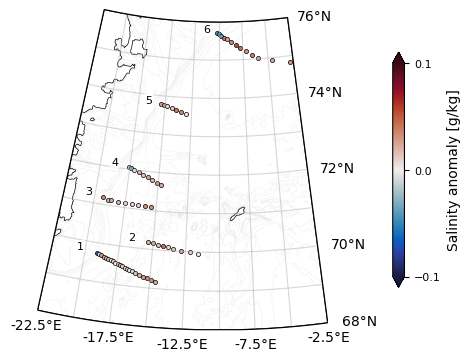

In [48]:
# Map of bottom anom of observations and model

# Assuming depth, res, res_smooth, X, and Y are already defined in your Jupyter notebook

lon = depth['XC']
lat = depth['YC']

fig, axs = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo(central_longitude=-10)},
                            figsize=(4.6, 4), layout='constrained')

# Set the extent to focus on the desired geographical area
extent = [-22.5+10, -2.5+10, 68, 76]

# # Plot the data using pcolormesh
# ax.pcolormesh(lon, lat, depth, cmap=cmo.deep,alpha=0.3, transform=ccrs.PlateCarree())
# Add land contour
axs.contour(lon,lat,depth_notZero,[0], linewidths=0.5,colors='black', transform=ccrs.PlateCarree())
axs.contour(lon,lat,depth_notZero,[100,200,300,400,500,750,1000,1500,2000,3000,4000], linewidths=0.5,colors='grey',alpha=0.1, transform=ccrs.PlateCarree())

cmap = cmo.balance

for num, sec in enumerate(sec_var):
    for sta_num, sta in enumerate(sec):
        if sta_num == 0:
            axs.annotate(num+1,(sta.lon-1.5, sta.lat),fontsize=8,transform=ccrs.PlateCarree(),bbox=dict(facecolor='white', alpha=1, edgecolor='none', boxstyle='round,pad=0.1'))
        mesh = axs.scatter(sta.lon, sta.lat, s=9, c=sta[-1], cmap=cmap, vmax=0.1, vmin=-0.1, edgecolor='black', linewidths=0.5, transform=ccrs.PlateCarree())

cbar = fig.colorbar(mesh, shrink=0.6, pad=0.05,extend='both')
cbar.set_label('Salinity anomaly [g/kg]')
cbar.set_ticks([-0.1,0,0.1])

# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=axs.transData, edgecolor='black', facecolor='none')
axs.add_patch(patch)

# Set the boundary using the transformed path
axs.set_boundary(patch.get_path(), transform=axs.transData)


# Add gridlines without labels
gl = axs.gridlines(draw_labels=False,alpha=0.5)


# Manually add the labels for the bottom and right sides
xticks = np.arange(extent[0]-10, extent[1]-10 + 1, 5)  # Adjust the range and step as needed
yticks = np.arange(extent[2], extent[3] + 1, 2)  # Adjust the range and step as needed

# Add bottom labels
for xtick in xticks:
    axs.text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=10, ha='center', va='top')

# Add right labels
for ytick in yticks:
    axs.text(extent[1] + 1-10, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=10, ha='left', va='center')

# Save the figure
fig.savefig(r'C:\Users\eirik\Master\Figures\ModelObsAnomBott',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [49]:
display(34.9-median_all)

34.899216028388224

In [50]:
diff = []
for x,y in zip(modelFWC,obsFWC):
    for i,j in zip(x,y):
        diff.append((i.max().values-j.max())**2)

RMSE = np.sqrt(np.sum(diff)/len(diff))
print(len(diff),sum(diff))
print('RMSE: ',RMSE)

69 228.60592089620044
RMSE:  1.8202003429157823
